In [400]:
#####################################################################################################
######################### LOAN DATA SET  #######################################################
#####################################################################################################


In [401]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [402]:
#### getting the data

df = pd.read_csv('loan_data.csv')

In [403]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [405]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [406]:
df[df.duplicated()]                   #### no duplicates found

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In [407]:
####################################################################
############## Part III - Missing Values
####################################################################


In [408]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


Text(0.5, 1.0, 'Missing Data Heatmap')

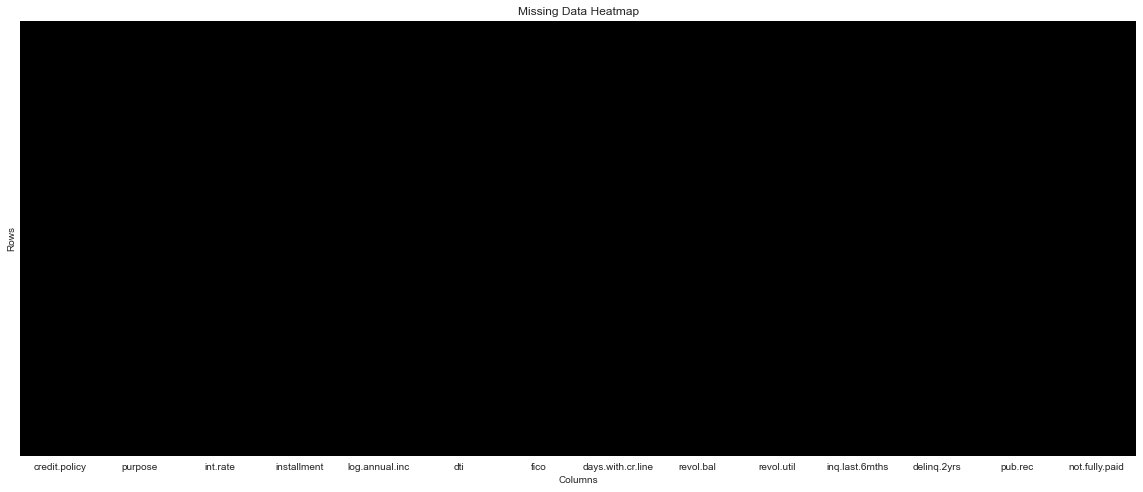

In [409]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [410]:
df.isnull().any()                         #### no null data

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [411]:
####################################################################
############## Part IV - Feature Engineering
####################################################################


In [412]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [413]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [414]:
df['pub.rec'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [415]:
df['credit.policy'].unique()

array([1, 0], dtype=int64)

In [416]:
df.rename(columns={'credit.policy':'credit_policy',
                   'int.rate':'int_rate',
                   'log.annual.inc':'annual_income',
                   'dti':'debt_to_income',
                   'days.with.cr.line':'days_credit_line',
                   'revol.bal':'revol_balance',
                   'revol.util':'revol_utilization_rate',
                   'inq.last.6mths':'inq_6_months',
                   'delinq.2yrs':'past_due',
                   'pub.rec':'public_records',
                   'not.fully.paid':'paid'},inplace=True)

In [417]:
df.head()

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [418]:
######################################################################
############## Part V - EDA
######################################################################


Text(0, 0.5, 'Density')

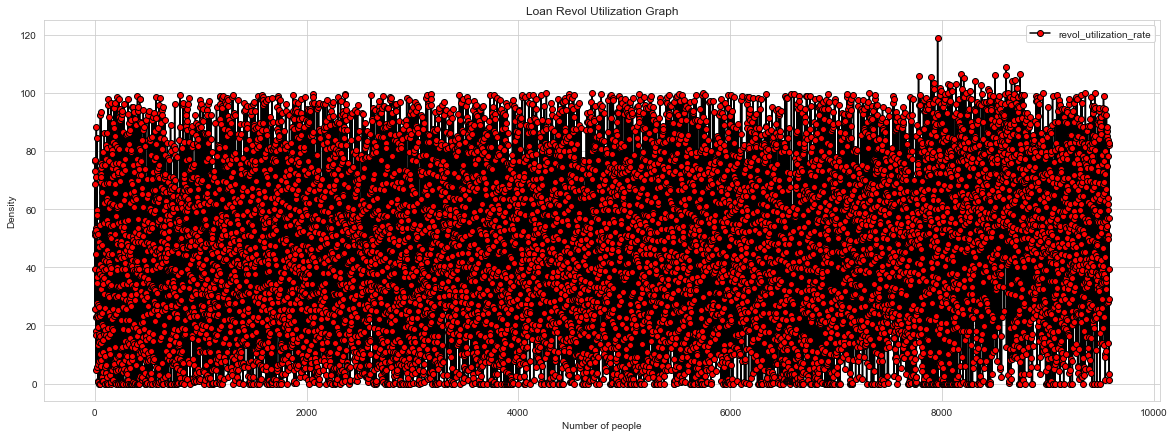

In [419]:
df['revol_utilization_rate'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Loan Revol Utilization Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')


#### revol_utilization_rate is amount of credit line used compared to what they have in total
#### it seems the mean is falling around 40-50 ratio which honestly is not bad
#### we will have to see their revol_balance to know if they pay it all back 

In [420]:
df.revol_utilization_rate.mean()

46.79923574859053

In [421]:
df.revol_utilization_rate.std()

29.014416965641058

Text(0, 0.5, 'Density')

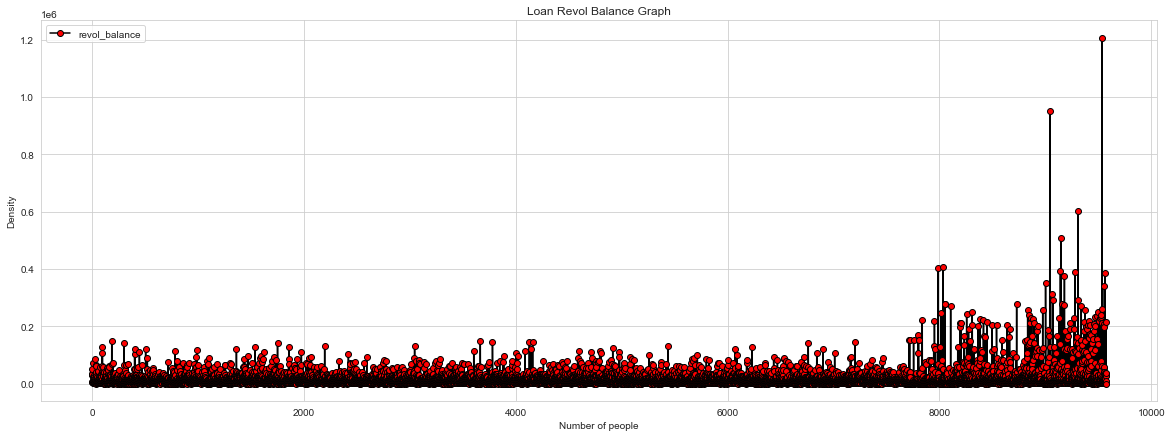

In [422]:
df['revol_balance'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Loan Revol Balance Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')


#### from the plot it seems theres some massive outliers here but the mean seems to be in 0.2 density range, meaning around 1500-1800 range

In [423]:
df.revol_balance.mean()                    #### seems like we were right about the mean

16913.963875548132

In [424]:
df.revol_balance.min()

0

In [425]:
df.revol_balance.max()                      #### this is throwing it off

1207359

In [426]:
corr = df.corr()                            #### lets see the corr quickly

<AxesSubplot:>

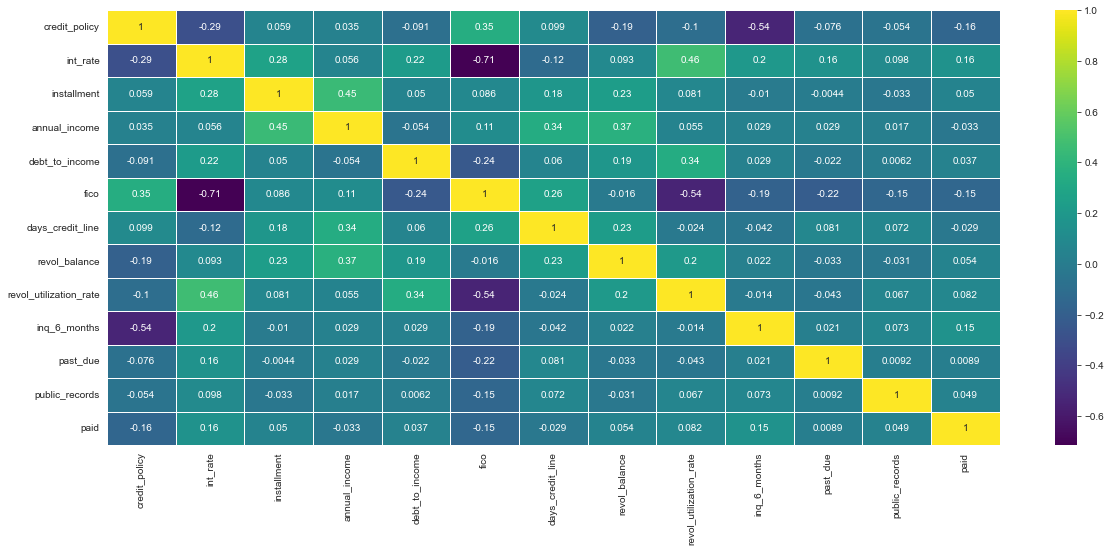

In [427]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


#### from this its very crystal which feature columns we will pay more attention to

Text(0, 0.5, 'Density')

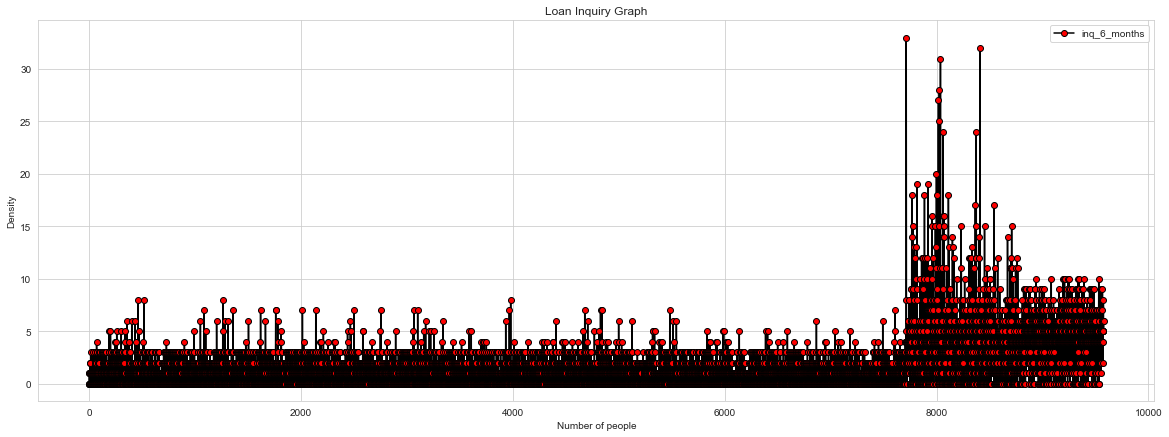

In [428]:
df['inq_6_months'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Loan Inquiry Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')

#### seems like the mean should be between 0-5

In [429]:
df.inq_6_months.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 33,  9, 18, 14, 15, 13, 12, 10,
       19, 11, 16, 20, 27, 25, 28, 31, 24, 17, 32], dtype=int64)

In [430]:
df.inq_6_months.mean()

1.5774692002505741

In [431]:
df.head()

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


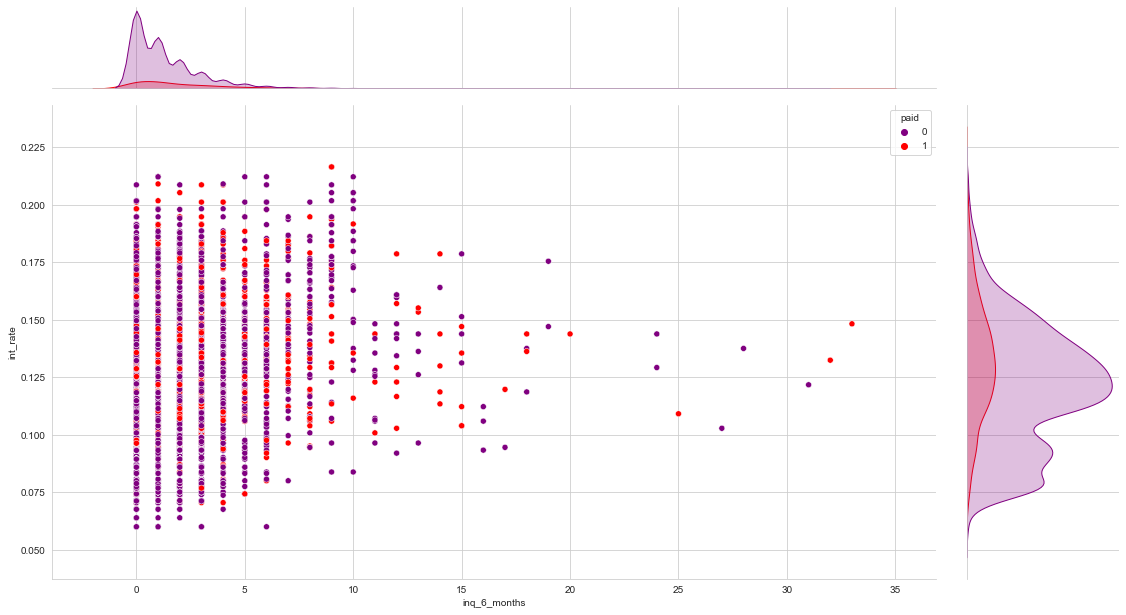

In [432]:
custom = {0:'purple',
         1:'red'}

g = sns.jointplot(x=df.inq_6_months,y=df.int_rate,data=df,hue='paid',palette=custom)

g.fig.set_size_inches(17,9)


#### its hard to derive any conclusion from this but the sweat spot is people who get more then 10-15 inqueries majority dont pay
#### but again deriving anything from this is not a good idea as people who got more then 30 inqueries did pay up the loan

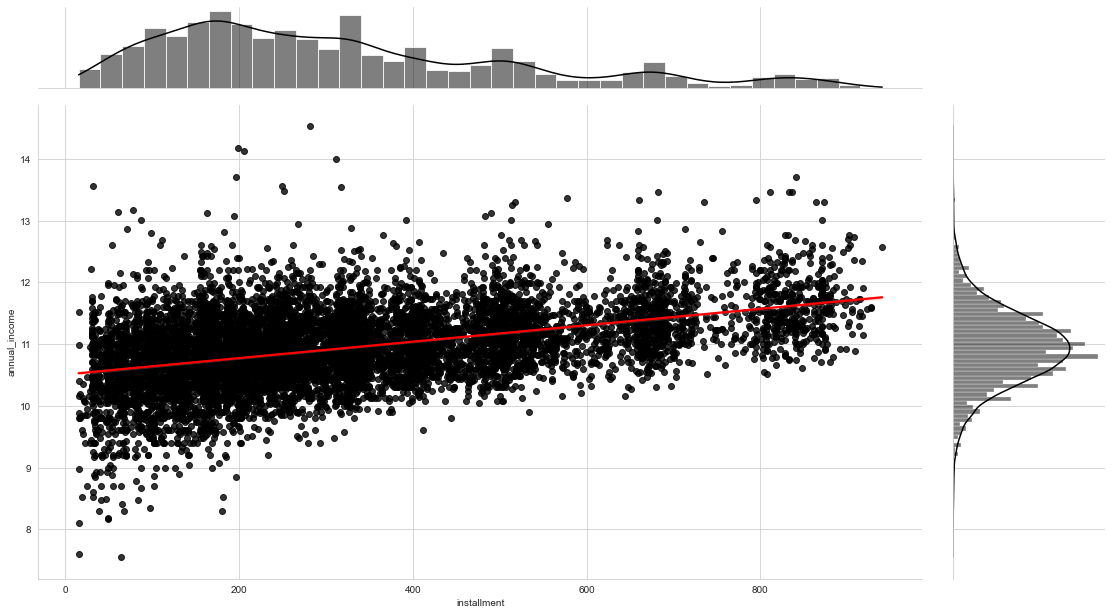

In [433]:
g = sns.jointplot(x='installment',y='annual_income',data=df,kind='reg',color='black',joint_kws={'line_kws':{'color':'red'}})

g.fig.set_size_inches(17,9)


#### seems like as the scale for income increases the installment for the payment also increases which suggests people with more income get more credit balance hence the increase which makes sense

In [434]:
from scipy.stats import pearsonr                  #### lets see this with pearsonr

In [435]:
co_eff, p_value = pearsonr(df.annual_income,df.installment)

In [436]:
co_eff                              #### this is amazing correlation

0.44810215368962636

In [437]:
p_value                             #### p_value is less then 0.05 hence we accept correlation here

0.0

In [438]:
df.head()                          #### we will go ahead now and convert the categorical column purpose to numerical to see if they have any correlation

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [439]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [440]:
df['reasons'] = df.purpose.map({'debt_consolidation':0,
                                'credit_card':1,
                                'all_other':2,
                                'home_improvement':3,
                                'small_business':4,
                                'major_purchase':5,
                                'educational':6})

In [441]:
df.head(1)

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0


In [442]:
corr = df.corr()

<AxesSubplot:>

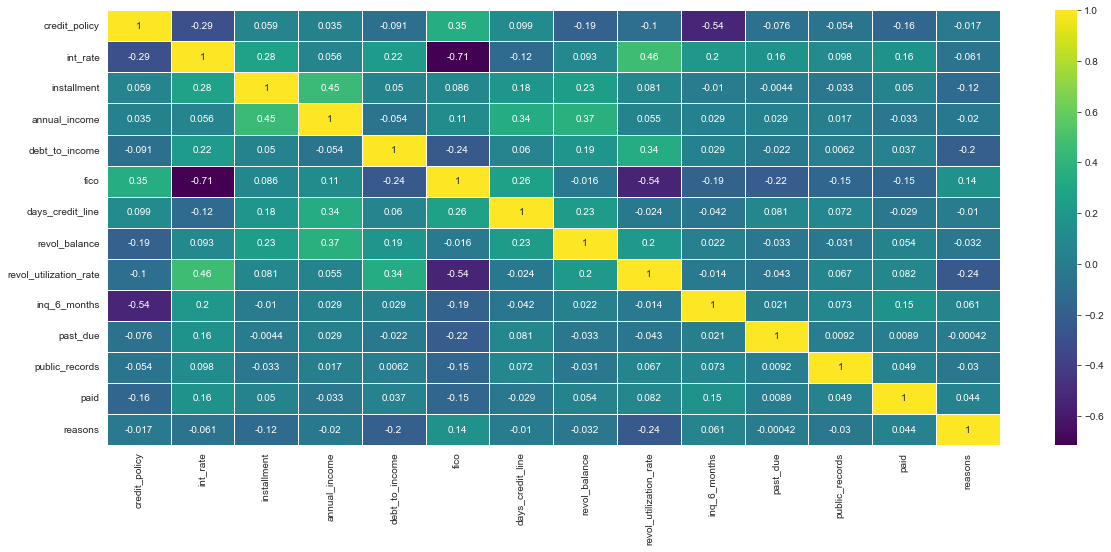

In [443]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


#### seems like reasons is a factor to the end result, interesting

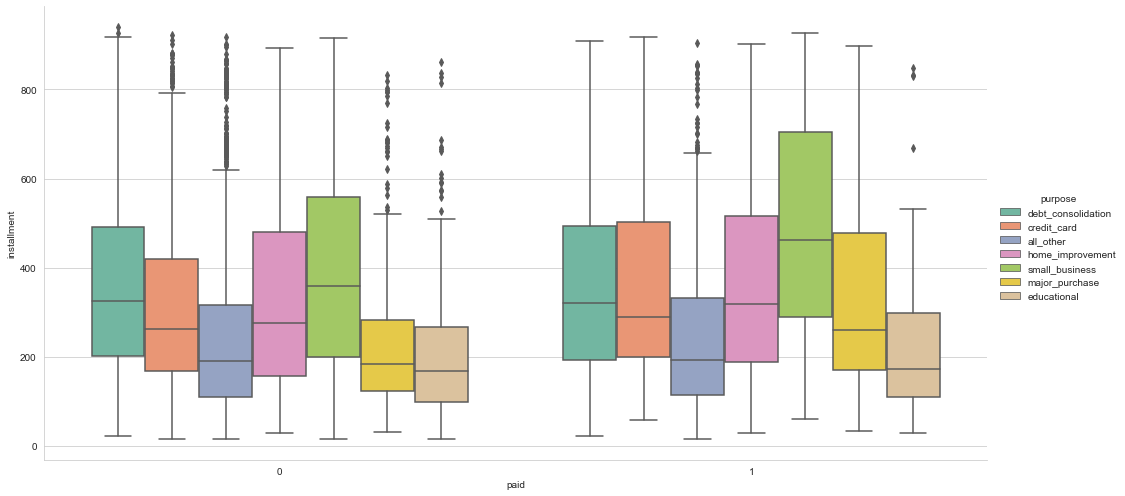

In [444]:
sns.catplot(x='paid',y='installment',data=df,kind='box',height=7,aspect=2,legend=True,hue='purpose',palette='Set2')


#### pretty interesting, its a very tight between who pays and who dont pay
#### majority of people who don't pay are from small businesses but on the other hand majority of people who do pay are from the same category
#### the only major point we can derive from here is that people who take the loan based on major purchases majority of them pay us back

In [445]:
new_df = df.groupby(['purpose','fico'])['paid'].sum().unstack()

new_df                                 #### we did something very interesting here, this is how we can see who will pay and who will not

fico,612,617,622,627,632,637,642,647,652,657,...,782,787,792,797,802,807,812,817,822,827
purpose,,,,,,,,,,,,,,,,,,,,,
all_other,NaN,NaN,NaN,NaN,2.0,1.0,8.0,8.0,10.0,9.0,...,1.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,NaN
credit_card,NaN,NaN,NaN,1.0,0.0,0.0,2.0,6.0,4.0,6.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
debt_consolidation,0.0,1.0,0.0,0.0,NaN,1.0,14.0,16.0,14.0,17.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
educational,0.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,4.0,2.0,...,0.0,1.0,0.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN
home_improvement,NaN,NaN,NaN,NaN,1.0,NaN,2.0,4.0,2.0,2.0,...,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,NaN,0.0
major_purchase,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
small_business,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,2.0,...,4.0,1.0,2.0,0.0,1.0,0.0,0.0,NaN,0.0,NaN


In [446]:
new_df.fillna(0,inplace=True)

In [447]:
new_df

fico,612,617,622,627,632,637,642,647,652,657,...,782,787,792,797,802,807,812,817,822,827
purpose,,,,,,,,,,,,,,,,,,,,,
all_other,0.0,0.0,0.0,0.0,2.0,1.0,8.0,8.0,10.0,9.0,...,1.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
credit_card,0.0,0.0,0.0,1.0,0.0,0.0,2.0,6.0,4.0,6.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
debt_consolidation,0.0,1.0,0.0,0.0,0.0,1.0,14.0,16.0,14.0,17.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
educational,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,2.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
home_improvement,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,2.0,2.0,...,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
major_purchase,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
small_business,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,...,4.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='fico', ylabel='purpose'>

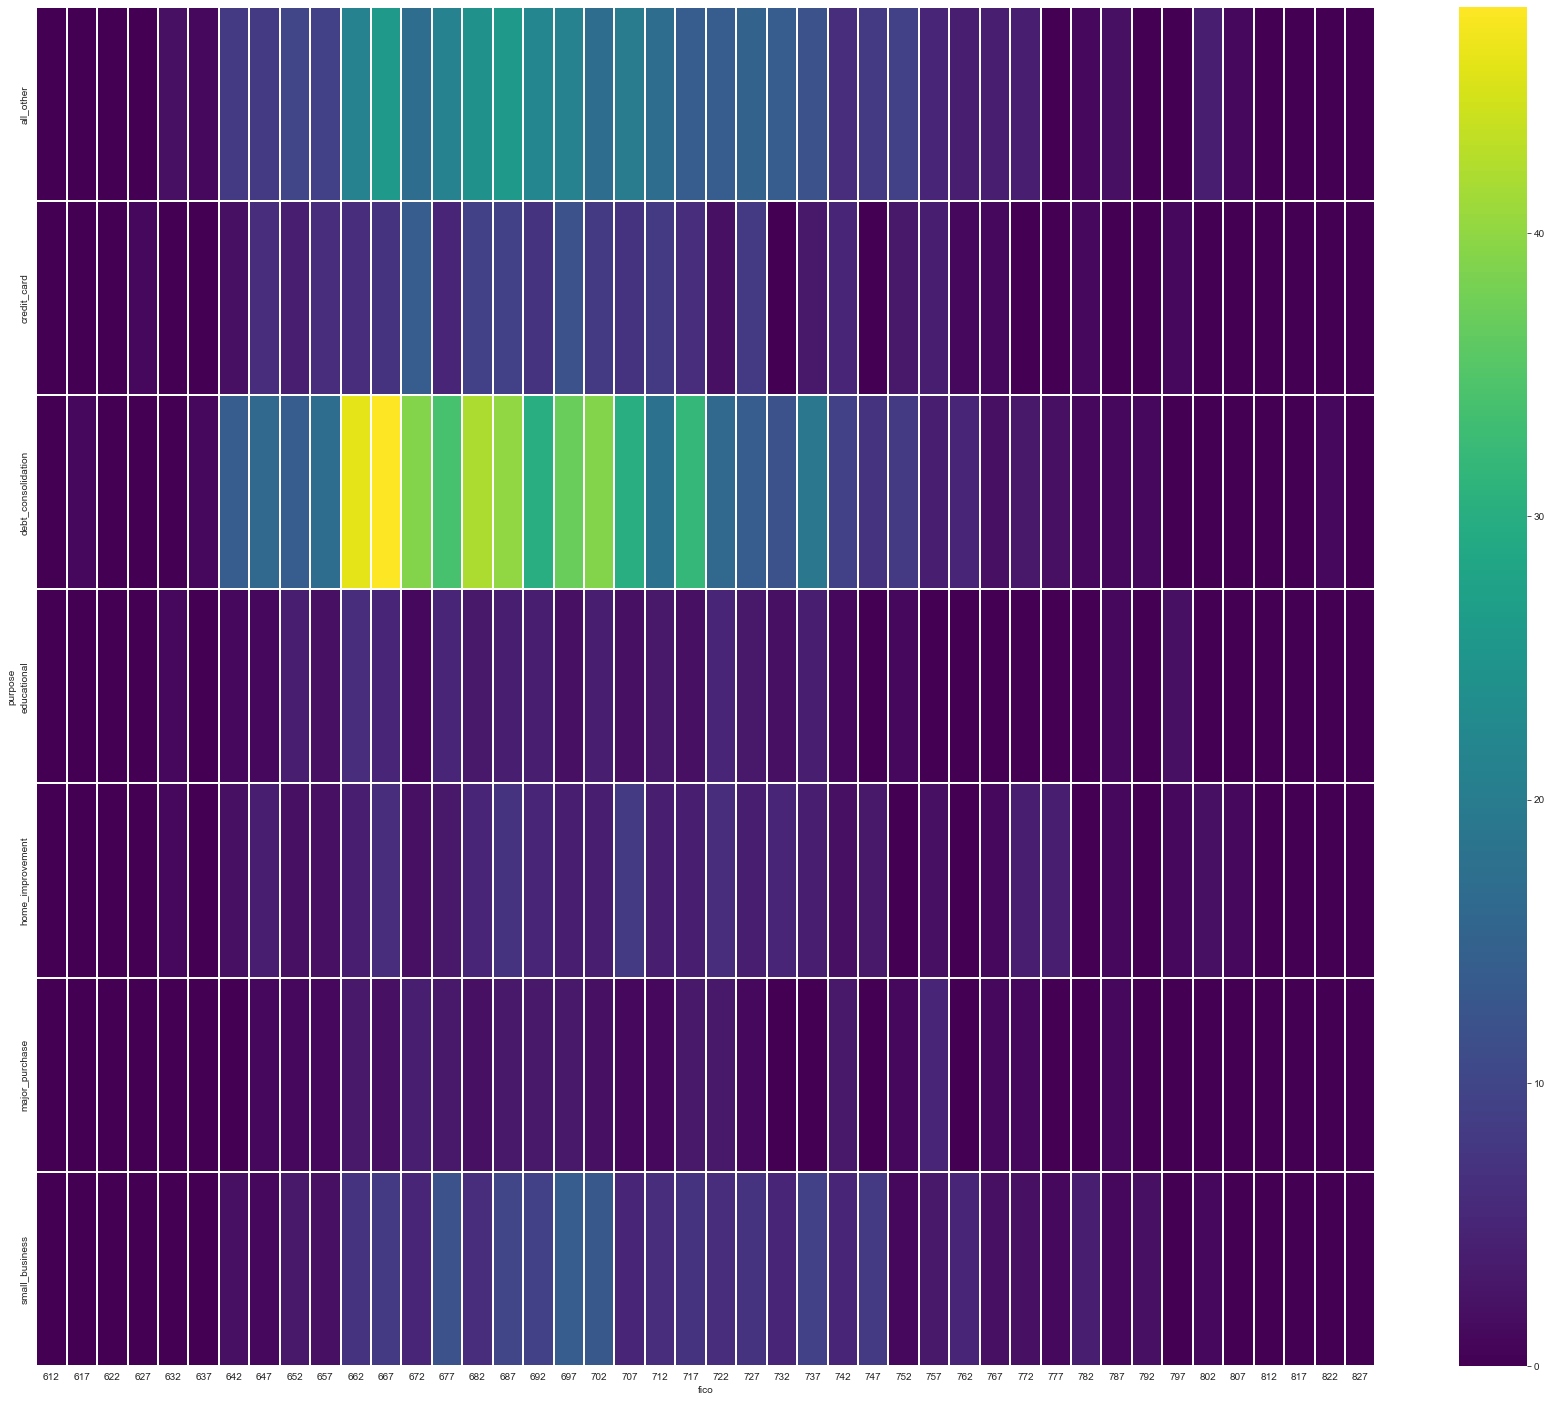

In [448]:
fig, ax = plt.subplots(figsize=(30,25)) 

sns.heatmap(new_df,linewidths=0.1,ax=ax,cmap='viridis')


#### this is quite interesting, from here we see that fico score doesn't matter to depict if they will pay or not
#### but we can derive something from here like people who take loans based on other reasons majority of them pay back when their fico scores are 640-730
#### seems like the safest bet is debt_consolidation and who has fico scores of 662-700 which is ironic if you ask me as someone will think better fico scores meaning they pay back quicker but not here

In [449]:
new_df.loc['debt_consolidation'].sort_values(ascending=False).head()            #### the best ones who has paid us back from this section


fico
667    48.0
662    46.0
682    42.0
687    40.0
702    39.0
Name: debt_consolidation, dtype: float64

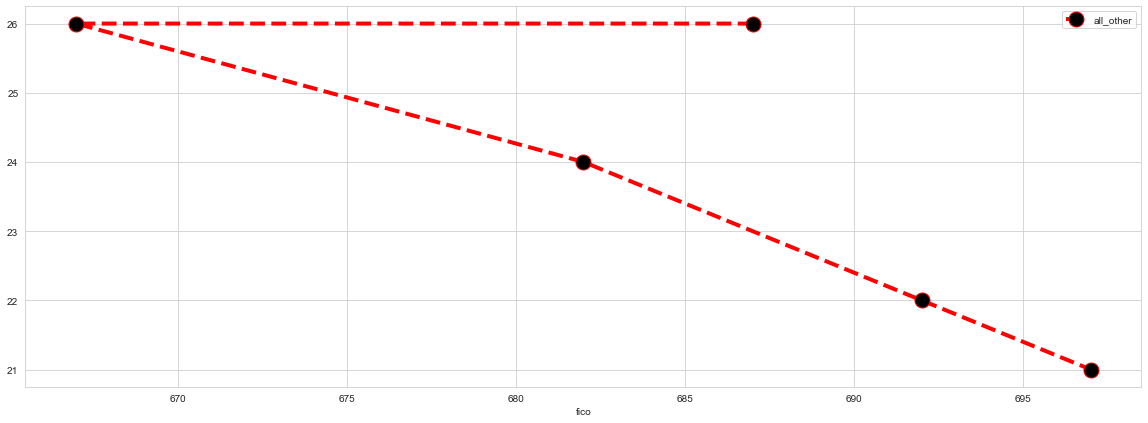

In [450]:
df_2 = new_df.loc['all_other'].sort_values(ascending=False).head().plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',markersize=15,linestyle='dashed',linewidth=4,color='red')


#### this is top fico scores and people who paid back from all other reasons 

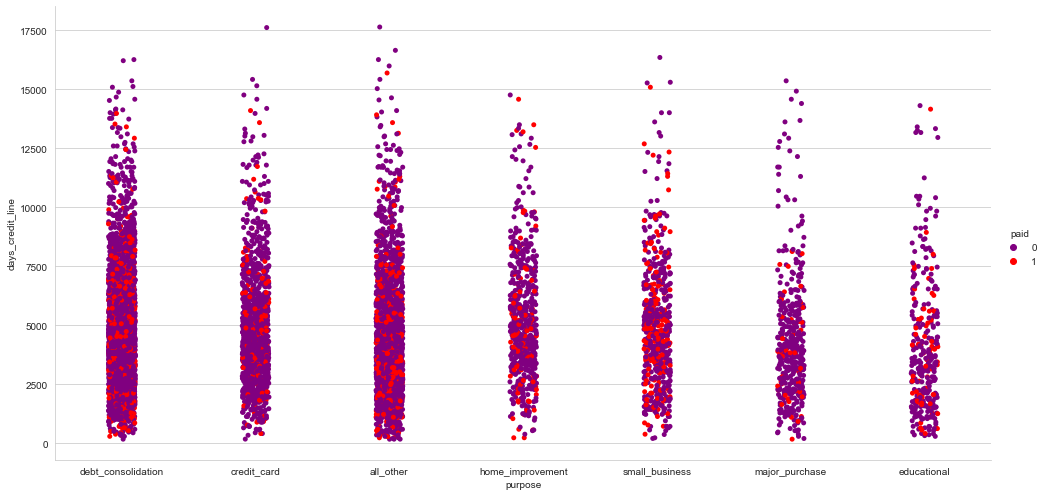

In [451]:
sns.catplot(x='purpose',y='days_credit_line',data=df,kind='strip',height=7,aspect=2,palette=custom,legend=True,hue='paid',jitter=True)


#### seems like majority of people with higher number of days they had the credit ended up paying it except some few in each of the purpose categories

In [452]:
new_df = df.groupby(['purpose','inq_6_months'])['paid'].sum().unstack()

new_df


inq_6_months,0,1,2,3,4,5,6,7,8,9,...,18,19,20,24,25,27,28,31,32,33
purpose,,,,,,,,,,,,,,,,,,,,,
all_other,104.0,98.0,41.0,52.0,29.0,20.0,14.0,5.0,10.0,6.0,...,2.0,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,NaN
credit_card,41.0,42.0,18.0,16.0,8.0,6.0,6.0,5.0,2.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN
debt_consolidation,184.0,168.0,71.0,58.0,41.0,25.0,16.0,12.0,11.0,6.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0
educational,15.0,14.0,10.0,10.0,4.0,2.0,6.0,5.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_improvement,16.0,15.0,21.0,17.0,12.0,9.0,5.0,3.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_purchase,17.0,6.0,11.0,5.0,3.0,1.0,2.0,1.0,0.0,0.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
small_business,50.0,29.0,26.0,22.0,15.0,13.0,5.0,6.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [453]:
new_df.fillna(0,inplace=True)

<AxesSubplot:xlabel='inq_6_months', ylabel='purpose'>

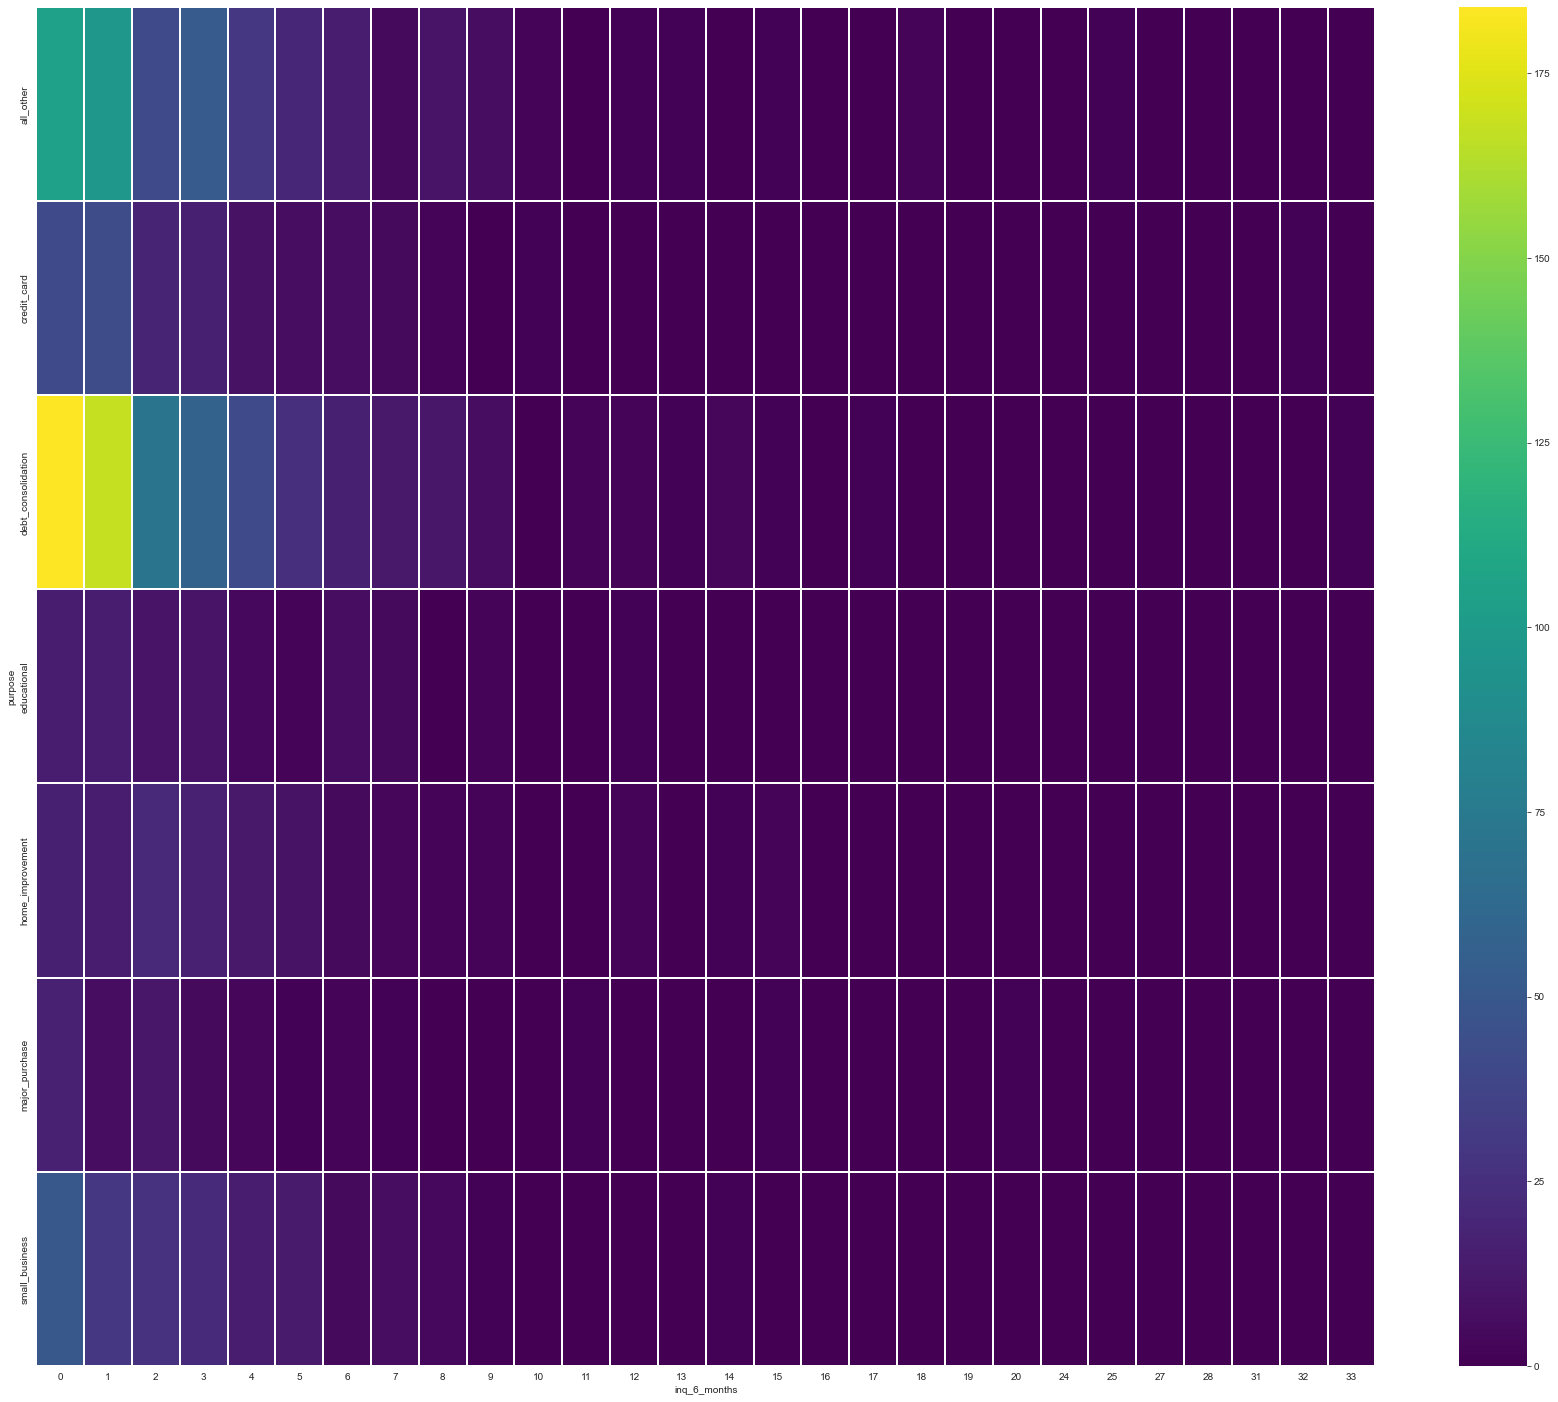

In [454]:
fig, ax = plt.subplots(figsize=(30,25)) 

sns.heatmap(new_df,linewidths=0.1,ax=ax,cmap='viridis')


#### this is pretty good way to see that people who had less inquery in last 6 month ended up paying their loans regardless of their reasons

In [455]:
df.head()

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


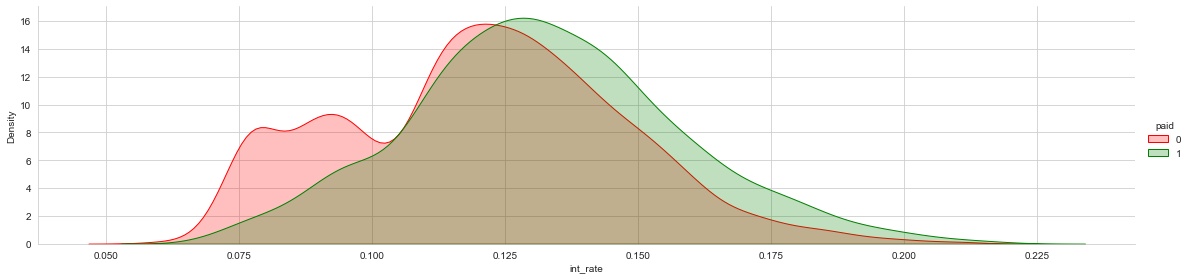

In [456]:
custom = {0:'red',
          1:'green'}

pl = sns.FacetGrid(df,hue='paid',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'int_rate',fill=True)

pl.add_legend()


#### seems like people don't tend to pay when the interest rate is low but when it goes to higher level people tends to be paying more


([<matplotlib.axis.XTick at 0x1899a7e9898>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

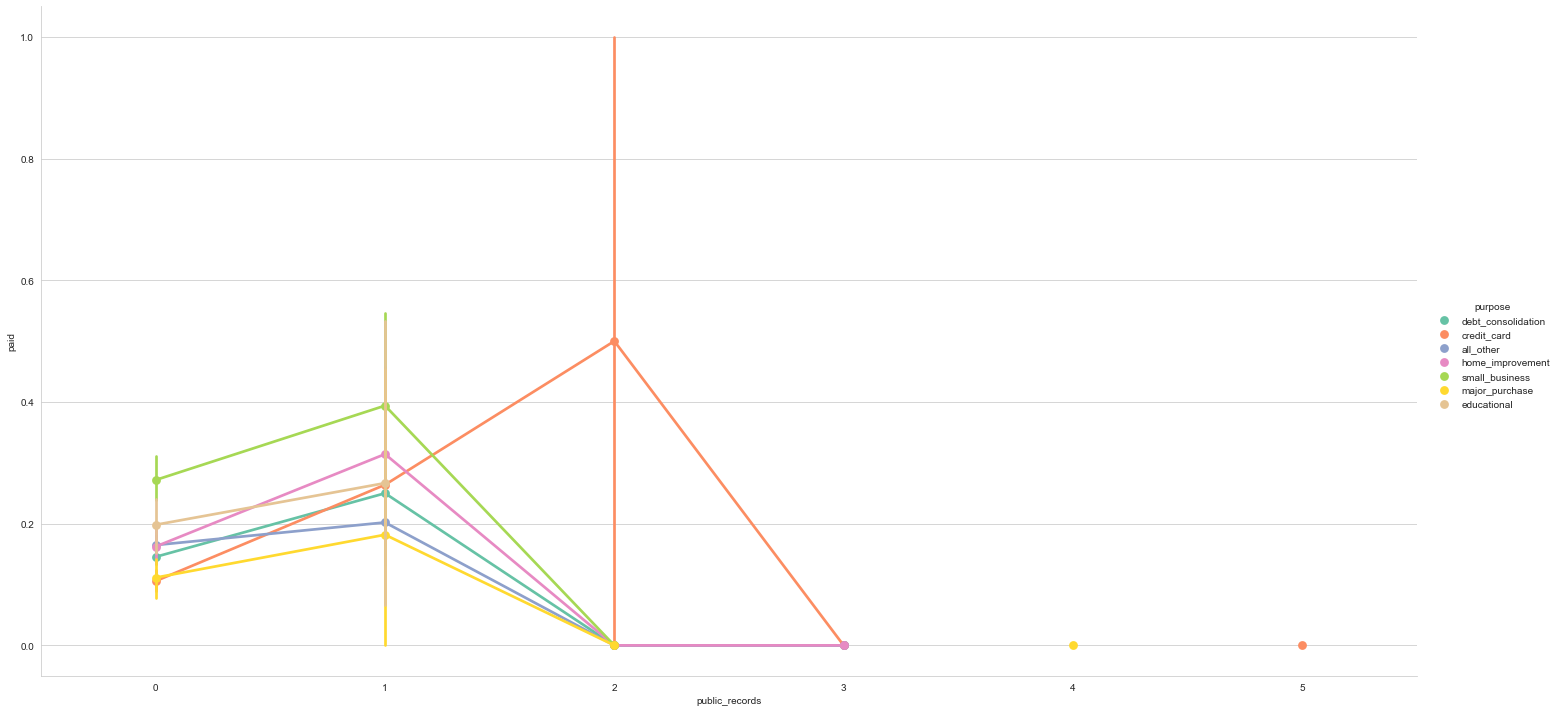

In [457]:
pl = sns.catplot(y='paid',x='public_records',data=df,kind='point',hue='purpose',height=10,aspect=2,palette='Set2')

plt.xticks([0,1,2,3,4,5])


#### we can see that people who had less then 3 public records are more likely to pay back especially if its credit card as the feature

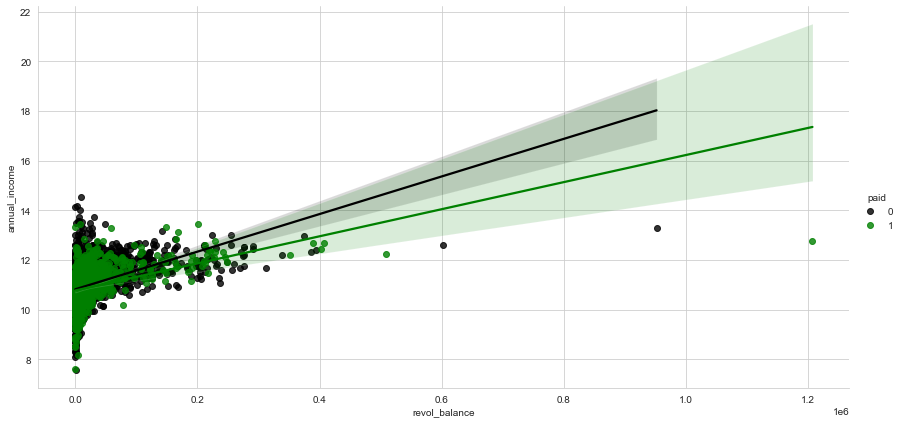

In [458]:
custom = {0:'black',
          1:'green'}

sns.lmplot(x='revol_balance',y='annual_income',data=df,hue='paid',palette=custom,height=6,aspect=2)


#### we have some major outliers here but definately we see the linear relationship between annual income and revol balance

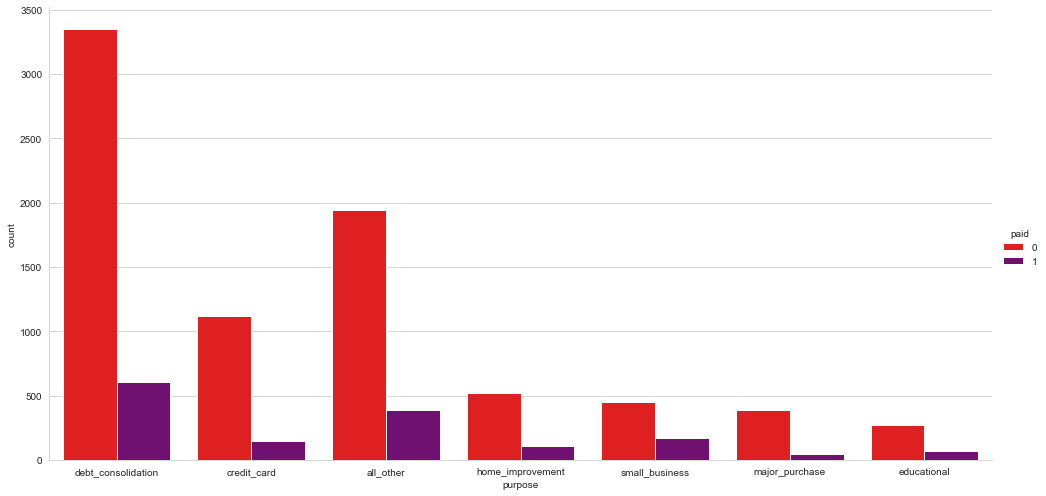

In [459]:
custom = {0:'red',
          1:'purple'}


sns.catplot(x='purpose',data=df,kind='count',hue='paid',palette=custom,height=7,aspect=2)

#### this is quite revealing and telling, seems like debt_consolidation is the biggest one here who hasn't paid fully

In [460]:
df.head()

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


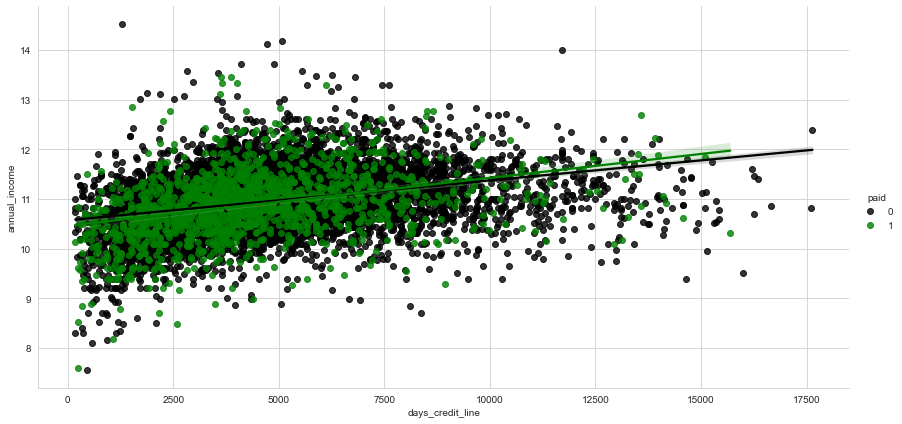

In [461]:
custom = {0:'black',
          1:'green'}

sns.lmplot(x='days_credit_line',y='annual_income',data=df,hue='paid',palette=custom,height=6,aspect=2)


#### we clearly see the linear relationship here, also its hard but we can see as credit line days increase the probability of paying it goes down

In [462]:
mean_df = df.int_rate.mean()

mean_df

0.12264006055543834

In [463]:
std_df = df.int_rate.std()

std_df

0.026846987213382724

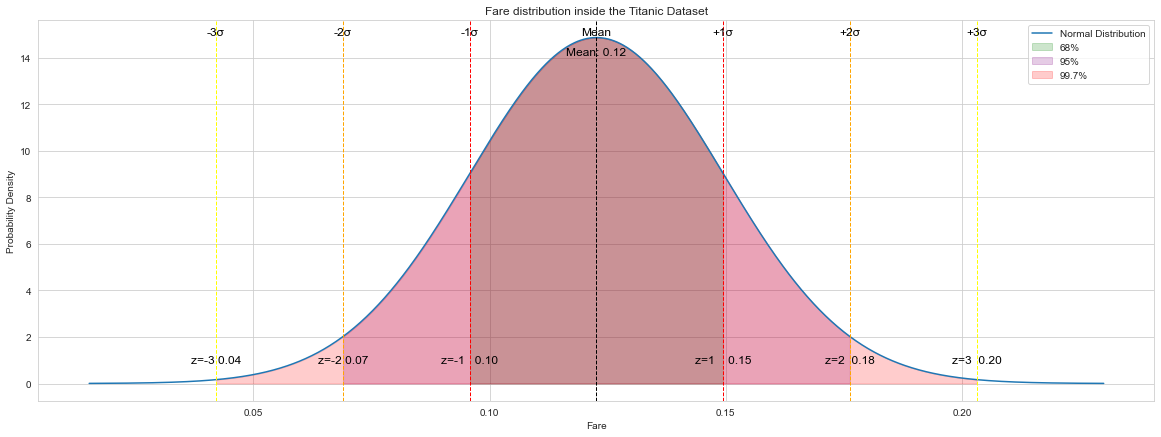

In [464]:
#### lets dive deeper into interest rate in the loans 

from scipy.stats import norm

x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(20, 7))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### areas under the curve
plt.fill_between(x, y, where=(x >= mean_df - std_df) & (x <= mean_df + std_df), color='green', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x >= mean_df - 2*std_df) & (x <= mean_df + 2*std_df), color='purple', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x >= mean_df - 3*std_df) & (x <= mean_df + 3*std_df), color='red', alpha=0.2, label='99.7%')

#### mean and standard deviations
plt.axvline(mean_df, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 3*std_df, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 3*std_df, color='yellow', linestyle='dashed', linewidth=1)

plt.text(mean_df, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, plt.gca().get_ylim()[1]*0.05, f'z=1    {mean_df + std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, plt.gca().get_ylim()[1]*0.05, f'z=-1   {mean_df - std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=2  {mean_df + 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-2 {mean_df - 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=3  {mean_df + 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-3 {mean_df - 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')


#### annotate the plot
plt.text(mean_df, max(y), 'Mean', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, max(y), '-1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, max(y), '+1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, max(y), '-2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, max(y), '+2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, max(y), '-3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, max(y), '+3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')

#### labels
plt.title('Fare distribution inside the Titanic Dataset')
plt.xlabel('Fare')
plt.ylabel('Probability Density')

plt.legend()


#### seems like the mean deviates + or - 0.02 on either side

In [465]:
#### lets find out the interest rate of customers with confidence level of 95% then increase it to 99%

standard_error = std_df/np.sqrt(df.shape[0])


In [466]:
from scipy import stats

stats.norm.interval(alpha=0.95,loc=mean_df,scale=standard_error)               


(0.12210240240883681, 0.12317771870203988)

In [467]:
#### 99% confidence level that the interest rate falls between these for most customers

stats.norm.interval(alpha=0.99,loc=mean_df,scale=standard_error)


(0.12193345797486438, 0.12334666313601231)

In [468]:
df.int_rate.max()

0.2164

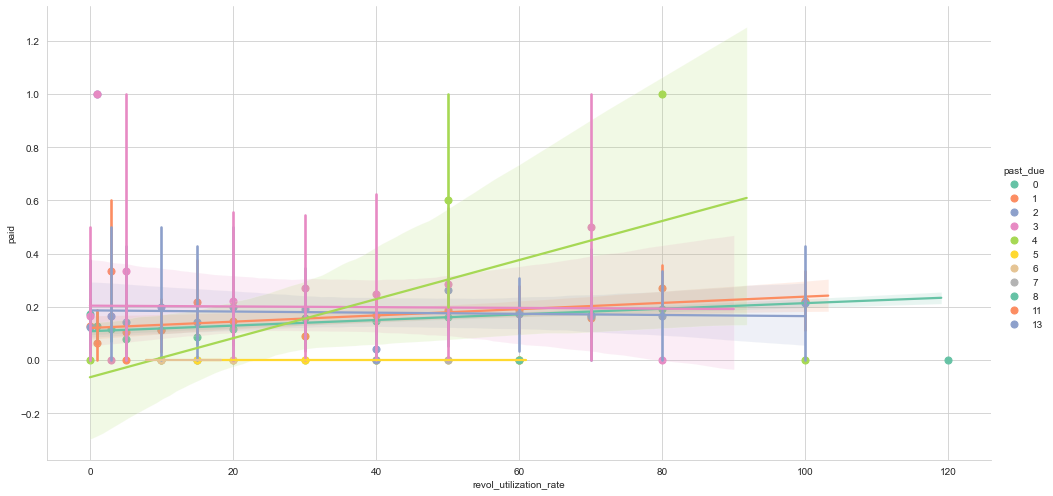

In [469]:
sns.lmplot(x='revol_utilization_rate',y='paid',data=df,hue='past_due',height=7,aspect=2,x_bins=[0,1,3,5,10,15,20,30,40,50,60,70,80,100,120],palette='Set2')


#### the most obvious and clear linear relationship I see is people who are past due 4 are most likely to pay back

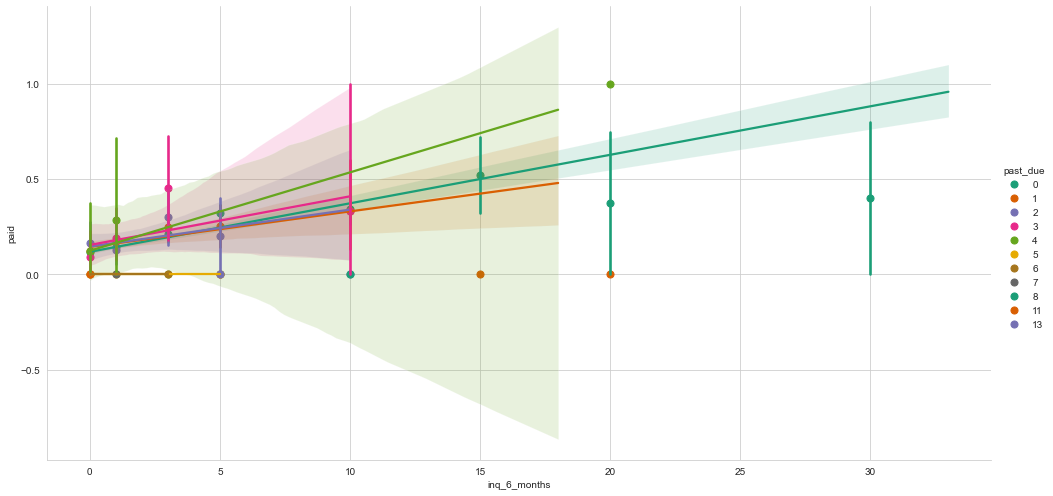

In [470]:
sns.lmplot(x='inq_6_months',y='paid',data=df,hue='past_due',height=7,aspect=2,x_bins=[0,1,3,5,10,15,20,30,40,50,60,70,80,100,120],palette='Dark2')


#### clearly we do see linear correlation here too

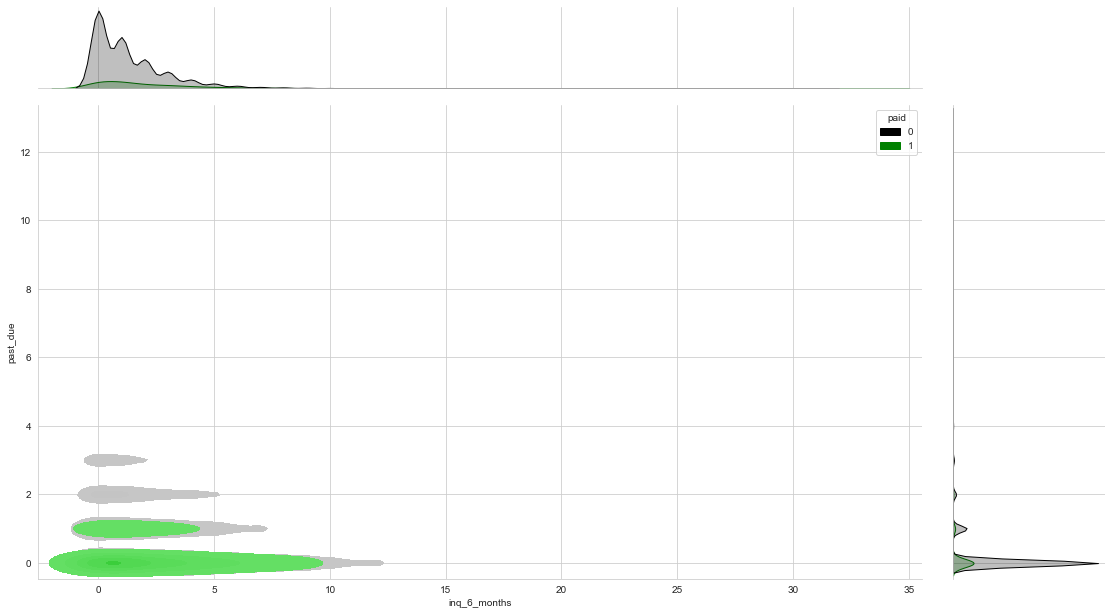

In [471]:
custom = {0:'black',
          1:'green'}

g = sns.jointplot(x=df.inq_6_months,y=df.past_due,data=df,hue='paid',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)

#### clearly we see something interesting here, people who are past due in the range of 0-1 and inqueries in the range of 0-10 are majority of good candidates

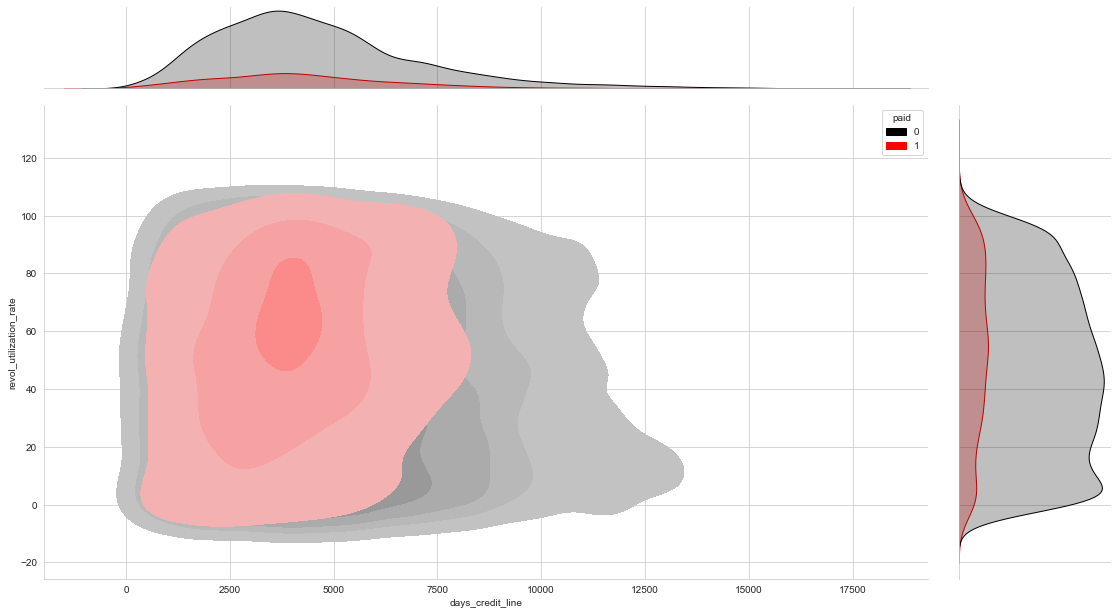

In [472]:
custom = {0:'black',
          1:'red'}

g = sns.jointplot(x=df.days_credit_line,y=df.revol_utilization_rate,data=df,hue='paid',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)


#### seems like evol_util_rate 60-80 and credit day line between 2500 and 5000 are the heavily densed paid customers


In [473]:
df.head()

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


In [474]:
heat = df.groupby(['past_due','inq_6_months'])['paid'].sum().unstack().fillna(0)

heat.head()

#### seems like people who had 0 inquery in last 6 months paid the most loans

inq_6_months,0,1,2,3,4,5,6,7,8,9,...,18,19,20,24,25,27,28,31,32,33
past_due,,,,,,,,,,,,,,,,,,,,,
0,377.0,320.0,173.0,151.0,96.0,71.0,46.0,33.0,24.0,17.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,36.0,41.0,19.0,21.0,9.0,4.0,8.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.0,6.0,4.0,6.0,4.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,4.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='inq_6_months', ylabel='past_due'>

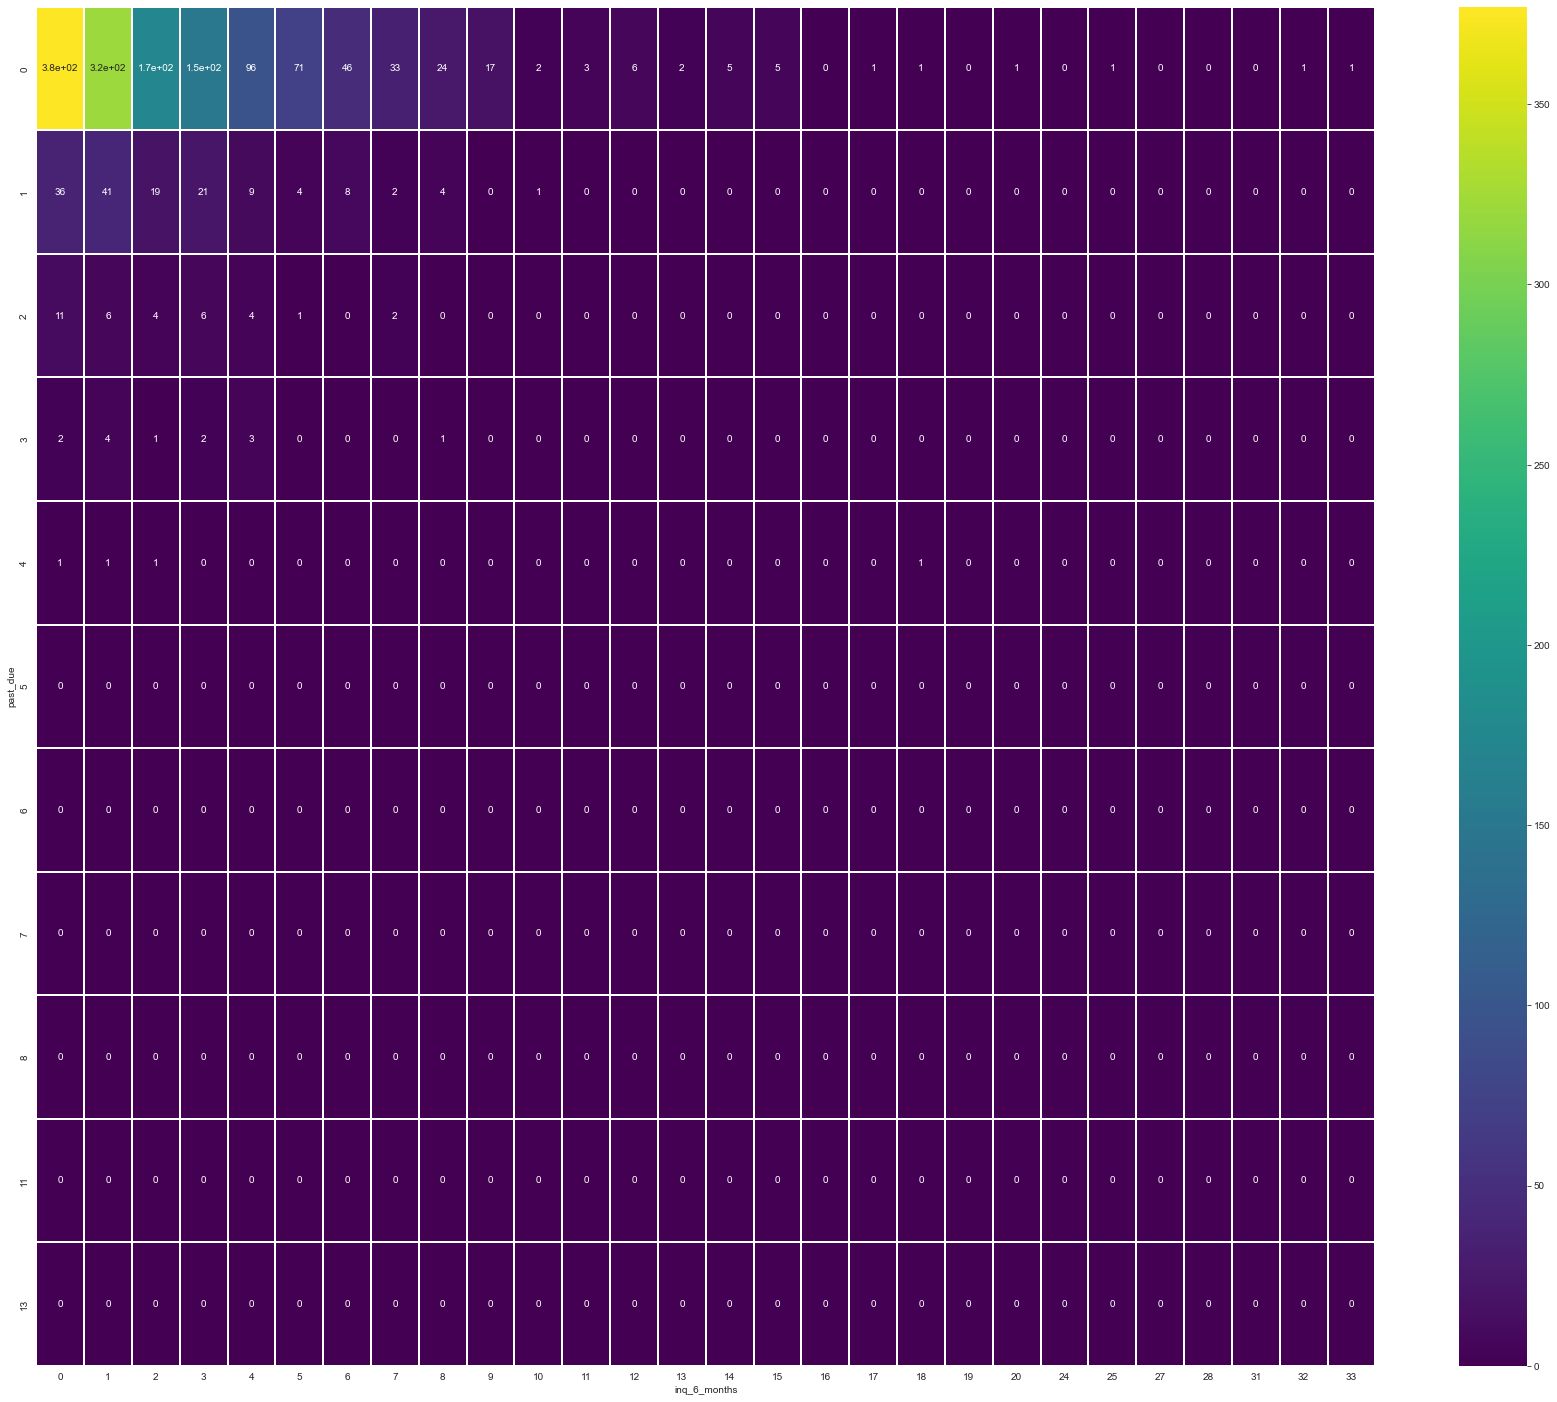

In [475]:
fig, ax = plt.subplots(figsize=(30,25)) 

sns.heatmap(heat,linewidths=0.1,ax=ax,cmap='viridis',annot=True)


#### its obvious that people who had inqueries in the range of 0-7 and past due of range 0-3 had the best stats in paying the loans
#### we now moving with PCA

In [476]:
######################################################################
############## Part VI - PCA
######################################################################


In [477]:
X = df.drop(columns=['purpose','paid'])

X.head()

,credit_policy,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,reasons
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1


In [478]:
y = df['paid']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: paid, dtype: int64

In [479]:
from sklearn.preprocessing import StandardScaler


In [480]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [481]:
from sklearn.decomposition import PCA

In [482]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
final_df = pd.concat([principal_df, y], axis=1)


In [483]:
final_df.head()                      #### beauty of PCA, amazing

,principal_component_1,principal_component_2,paid
0,-0.030797,2.378544,0
1,0.036544,0.084358,0
2,0.075016,-0.558391,0
3,-0.267816,0.107926,0
4,0.692865,-0.491881,0


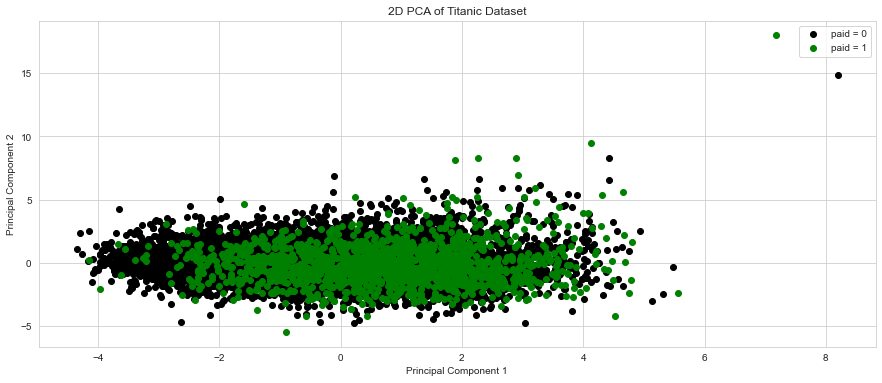

In [484]:
colors = {0: 'black', 1: 'green'}

plt.figure(figsize=(15, 6))

for i in final_df['paid'].unique():
    subset = final_df[final_df['paid'] == i]
    plt.scatter(subset['principal_component_1'], subset['principal_component_2'], 
                color=colors[i], label=f'paid = {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Titanic Dataset')
plt.legend()
plt.grid(True)


#### PCA makes it so much easier to make distinction and classify them

In [485]:
pca.n_features_                   #### how many features cols it has


13

In [486]:
pca.components_

array([[-0.32395827,  0.49744416,  0.09866392,  0.03154052,  0.27230956,
        -0.51168849, -0.0872973 ,  0.15724495,  0.4171675 ,  0.22166411,
         0.10714798,  0.10481179, -0.15138258],
       [ 0.12415748,  0.00586055,  0.47860441,  0.54791101,  0.08963613,
         0.19962061,  0.44054268,  0.42777702,  0.08341087, -0.10731279,
        -0.02420856, -0.02271722, -0.10369346]])

In [487]:
X.columns

Index(['credit_policy', 'int_rate', 'installment', 'annual_income',
       'debt_to_income', 'fico', 'days_credit_line', 'revol_balance',
       'revol_utilization_rate', 'inq_6_months', 'past_due', 'public_records',
       'reasons'],
      dtype='object')

In [488]:
df_comp = pd.DataFrame(pca.components_,columns=['credit_policy', 'int_rate', 'installment', 'annual_income','debt_to_income', 'fico', 'days_credit_line', 'revol_balance',
                                                'revol_utilization_rate', 'inq_6_months', 'past_due', 'public_records','reasons'])

In [489]:
df_comp.head()

,credit_policy,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,reasons
0,-0.323958,0.497444,0.098664,0.031541,0.272310,-0.511688,-0.087297,0.157245,0.417167,0.221664,0.107148,0.104812,-0.151383
1,0.124157,0.005861,0.478604,0.547911,0.089636,0.199621,0.440543,0.427777,0.083411,-0.107313,-0.024209,-0.022717,-0.103693


<AxesSubplot:>

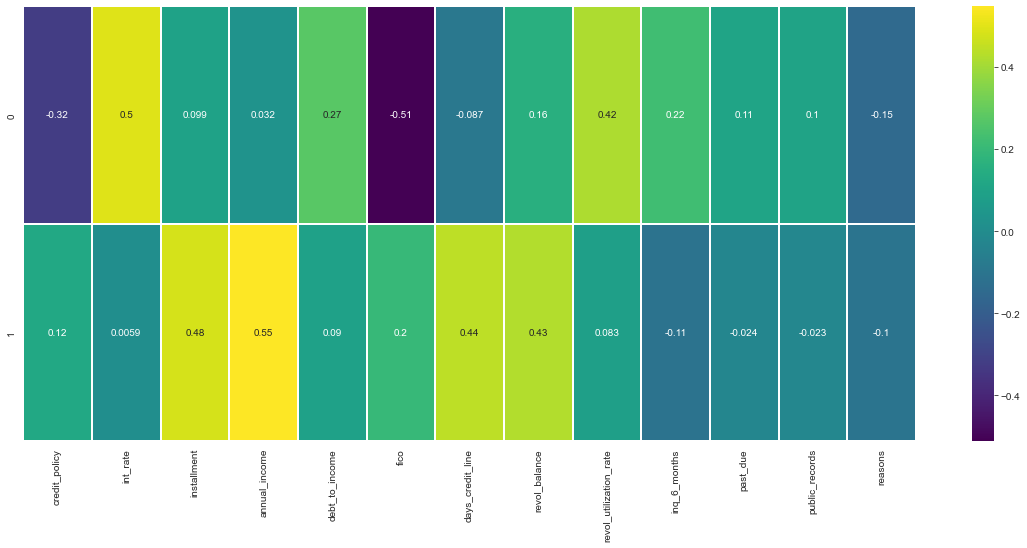

In [490]:
fig, ax = plt.subplots(figsize=(20,8)) 

sns.heatmap(df_comp,linewidths=0.1,ax=ax,cmap='viridis',annot=True)


#### this is just an amazing way to see what each of clusters correlation, if you were not provided with the target data then this is the way you can make clusters

In [491]:
#######################################################################
######################## Part VII - PCA Model
#######################################################################


In [492]:
final_df.head()

,principal_component_1,principal_component_2,paid
0,-0.030797,2.378544,0
1,0.036544,0.084358,0
2,0.075016,-0.558391,0
3,-0.267816,0.107926,0
4,0.692865,-0.491881,0


In [493]:
X = final_df.drop(columns='paid')

X.head()

,principal_component_1,principal_component_2
0,-0.030797,2.378544
1,0.036544,0.084358
2,0.075016,-0.558391
3,-0.267816,0.107926
4,0.692865,-0.491881


In [494]:
y = final_df['paid']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: paid, dtype: int64

In [495]:
from sklearn.model_selection import train_test_split


In [496]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [497]:
from sklearn.linear_model import LogisticRegression

In [498]:
model = LogisticRegression()

In [499]:
model.fit(X_train,y_train)

LogisticRegression()

In [500]:
y_predict = model.predict(X_test)

In [501]:
from sklearn import metrics

In [502]:
print(metrics.classification_report(y_test,y_predict))               #### problem here is recall, precision and f1 for 1 because the support is so unbalanced


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



In [503]:
y_test.value_counts()

0    2408
1     466
Name: paid, dtype: int64

In [504]:
y.value_counts()                     #### this is the problem

0    8045
1    1533
Name: paid, dtype: int64

In [505]:
from sklearn.utils import resample


In [506]:
df_majority = final_df[final_df['paid'] == 0]
df_minority = final_df[final_df['paid'] == 1]

df_minority

,principal_component_1,principal_component_2,paid
6,1.258304,-0.985853,1
7,-0.595432,0.038700,1
57,0.918674,2.010303,1
65,-0.474604,-1.933639,1
73,0.682780,1.599976,1
...,...,...,...
9573,2.772733,4.314362,1
9574,-0.435860,-0.868641,1
9575,1.839848,-1.572127,1
9576,1.420084,-1.354665,1


In [507]:
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=2000,  
                                   random_state=123)
df_majority_downsampled

,principal_component_1,principal_component_2,paid
1734,-0.200669,-0.945908,0
7877,2.101195,-2.592332,0
4544,-2.973744,-0.882868,0
4624,-2.846290,-0.328162,0
7677,-2.952666,-1.615609,0
...,...,...,...
8959,1.455929,1.712498,0
9326,1.728181,-0.933355,0
5348,1.265612,1.649810,0
8098,-1.337839,-1.752589,0


In [508]:
final_df = pd.concat([df_majority_downsampled, df_minority])

final_df                #### we had to somehow balance target to not throw off our other metrics when we do the modelling part

,principal_component_1,principal_component_2,paid
1734,-0.200669,-0.945908,0
7877,2.101195,-2.592332,0
4544,-2.973744,-0.882868,0
4624,-2.846290,-0.328162,0
7677,-2.952666,-1.615609,0
...,...,...,...
9573,2.772733,4.314362,1
9574,-0.435860,-0.868641,1
9575,1.839848,-1.572127,1
9576,1.420084,-1.354665,1


In [509]:
X = final_df.drop(columns='paid')

X.head()

,principal_component_1,principal_component_2
1734,-0.200669,-0.945908
7877,2.101195,-2.592332
4544,-2.973744,-0.882868
4624,-2.846290,-0.328162
7677,-2.952666,-1.615609


In [510]:
y = final_df['paid']

y.head()

1734    0
7877    0
4544    0
4624    0
7677    0
Name: paid, dtype: int64

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

y_test.value_counts()

0    623
1    437
Name: paid, dtype: int64

In [512]:
y_train.value_counts()

0    1377
1    1096
Name: paid, dtype: int64

In [513]:
model = LogisticRegression()

In [514]:
model.fit(X_train,y_train)

LogisticRegression()

In [515]:
y_predict = model.predict(X_test)

In [516]:
print(metrics.classification_report(y_test,y_predict))                #### not the best model but its ok for what we have as data set

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       623
           1       0.58      0.43      0.49       437

    accuracy                           0.63      1060
   macro avg       0.62      0.60      0.60      1060
weighted avg       0.63      0.63      0.62      1060



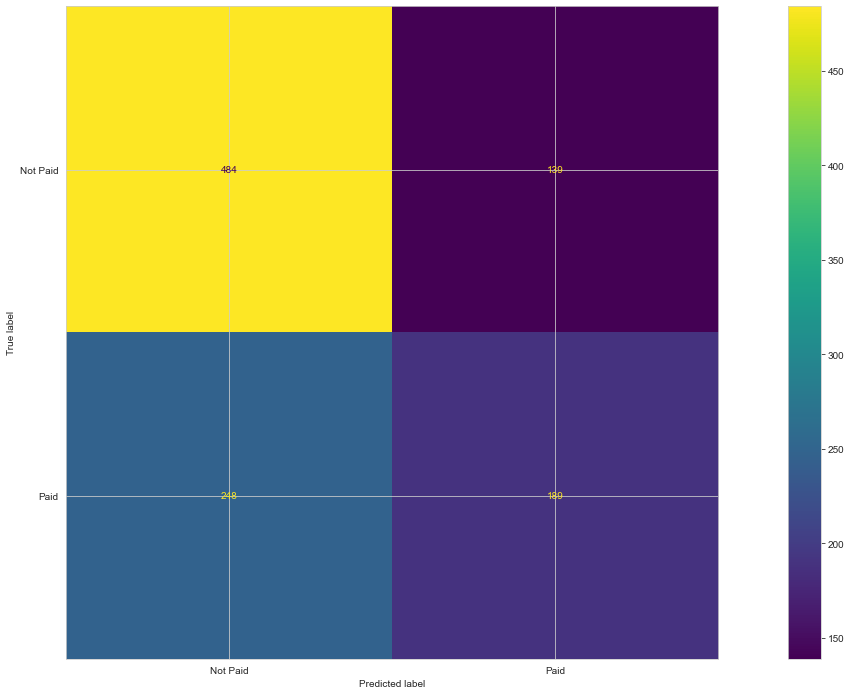

In [517]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['Not Paid','Paid']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(25,12))

disp.plot(ax=ax)


In [518]:
#############################################################################
################# PART VIII - Classification
#############################################################################


In [519]:
df.head()

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


In [520]:
X = df.drop(columns=['paid','reasons'])

X.head()

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [521]:
y = df['paid']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: paid, dtype: int64

In [522]:
from imblearn.over_sampling import SMOTE


In [523]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [524]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['purpose']),
        ('num', StandardScaler(), ['credit_policy', 'int_rate', 'installment', 
                                   'annual_income', 'debt_to_income', 'fico', 
                                   'days_credit_line', 'revol_balance', 
                                   'revol_utilization_rate', 'inq_6_months', 
                                   'past_due', 'public_records'])
    ])


In [525]:
from imblearn.pipeline import Pipeline as ImbPipeline


In [526]:
from xgboost import XGBClassifier


In [527]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [528]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [529]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

In [530]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [531]:
X.count()

credit_policy             9578
purpose                   9578
int_rate                  9578
installment               9578
annual_income             9578
debt_to_income            9578
fico                      9578
days_credit_line          9578
revol_balance             9578
revol_utilization_rate    9578
inq_6_months              9578
past_due                  9578
public_records            9578
dtype: int64

In [532]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=8, scoring='accuracy', cv=3, verbose=2, random_state=42)


In [533]:
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   1.4s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   1.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   1.7s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier_

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['purpose']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['credit_policy',
                                                                                'int_rate',
                                                                                'installment',
                                                                                'annual_income',
                                                                          

In [534]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


In [535]:
from sklearn.metrics import classification_report


In [536]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2414
           1       0.27      0.11      0.15       460

    accuracy                           0.81      2874
   macro avg       0.56      0.53      0.52      2874
weighted avg       0.75      0.81      0.77      2874



In [537]:
X = df.drop(columns=['past_due','credit_policy','annual_income','fico','days_credit_line','reasons'])

X.head()

,purpose,int_rate,installment,debt_to_income,revol_balance,revol_utilization_rate,inq_6_months,public_records,paid
0,debt_consolidation,0.1189,829.10,19.48,28854,52.1,0,0,0
1,credit_card,0.1071,228.22,14.29,33623,76.7,0,0,0
2,debt_consolidation,0.1357,366.86,11.63,3511,25.6,1,0,0
3,debt_consolidation,0.1008,162.34,8.10,33667,73.2,1,0,0
4,credit_card,0.1426,102.92,14.97,4740,39.5,0,0,0


In [538]:
corr = X.corr()

<AxesSubplot:>

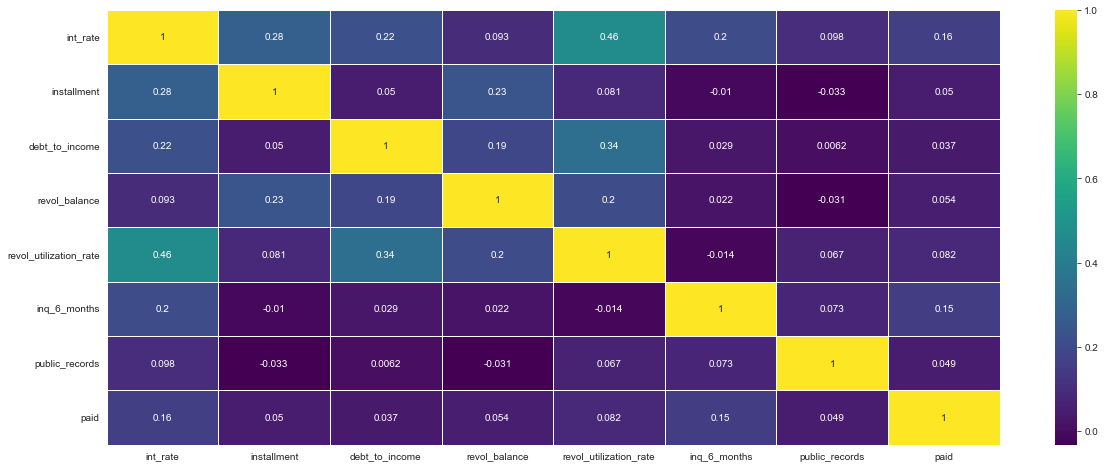

In [539]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')



In [540]:
y = df['paid']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: paid, dtype: int64

In [541]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['purpose']),
        ('num', StandardScaler(), ['int_rate', 'installment', 
                                   'debt_to_income', 
                                   'revol_balance', 
                                   'revol_utilization_rate', 'inq_6_months', 
                                   'public_records'])
    ])


In [542]:
X.drop(columns='paid',inplace=True)

X.head()

,purpose,int_rate,installment,debt_to_income,revol_balance,revol_utilization_rate,inq_6_months,public_records
0,debt_consolidation,0.1189,829.10,19.48,28854,52.1,0,0
1,credit_card,0.1071,228.22,14.29,33623,76.7,0,0
2,debt_consolidation,0.1357,366.86,11.63,3511,25.6,1,0
3,debt_consolidation,0.1008,162.34,8.10,33667,73.2,1,0
4,credit_card,0.1426,102.92,14.97,4740,39.5,0,0


In [543]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [545]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

In [546]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=8, scoring='accuracy', cv=5, verbose=2, random_state=42)


In [547]:
%%time

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   1.2s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   1.2s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   1.5s
[CV] END classifier_

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['purpose']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['int_rate',
                                                                                'installment',
                                                                                'debt_to_income',
                                                                                'revol_balance',
                                                                         

In [548]:
best_model = random_search.best_estimator_

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['purpose']),
                                                 ('num', StandardScaler(),
                                                  ['int_rate', 'installment',
                                                   'debt_to_income',
                                                   'revol_balance',
                                                   'revol_utilization_rate',
                                                   'inq_6_months',
                                                   'public_records'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=No...
                               enable_categorical=False, eval_metric='logloss',
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
  

In [549]:
y_predict = best_model.predict(X_test)

In [550]:
print(classification_report(y_test, y_predict))                        #### definately some improvement


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2414
           1       0.23      0.17      0.19       460

    accuracy                           0.78      2874
   macro avg       0.54      0.53      0.53      2874
weighted avg       0.75      0.78      0.76      2874



In [551]:
from imblearn.combine import SMOTEENN              #### more advanced resampling


In [552]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', SMOTEENN(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [553]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__colsample_bytree': [0.3, 0.7],
    'classifier__subsample': [0.5, 0.8]
}


In [554]:
%%time

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=2, random_state=42)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.3, classifier__learning

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.7s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimator

[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.5; total time=   3.3s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   1.3s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   1.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   1.4s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   1.4s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=1

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.5; total time=   2.1s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimato

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.5; total time=   2.2s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.5; total time=   2.1s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.3s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.3s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.3s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimato

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.6s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.4s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   1.6s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimat

In [555]:
best_model = random_search.best_estimator_


In [556]:
y_predict = best_model.predict(X_test)


In [557]:
print(classification_report(y_test, y_predict))              #### we did bring up the recall and other metrics but our accuracy has gone down


              precision    recall  f1-score   support

           0       0.87      0.71      0.78      2414
           1       0.23      0.45      0.30       460

    accuracy                           0.66      2874
   macro avg       0.55      0.58      0.54      2874
weighted avg       0.77      0.66      0.70      2874



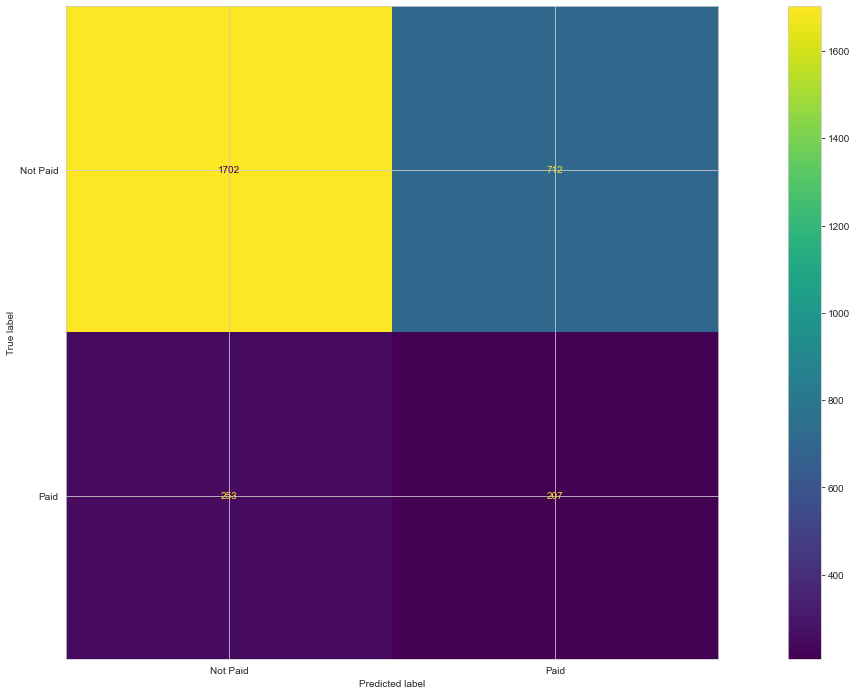

In [558]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['Not Paid','Paid']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(25,12))

disp.plot(ax=ax)

#### the support is throwing our model off even with SMOTEENN, if we had larger data for to train model then it would have been sorted

In [559]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [560]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()


In [561]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_clf),
    ('lr', log_clf),
    ('rf', rf_clf)
], voting='soft')


In [562]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', SMOTEENN(random_state=42)),
    ('classifier', voting_clf)
])


In [563]:
param_grid = {
    'classifier__xgb__n_estimators': [100, 200],
    'classifier__xgb__learning_rate': [0.01, 0.1],
    'classifier__xgb__max_depth': [3, 5],
    'classifier__rf__n_estimators': [100, 200],
    'classifier__rf__max_depth': [3, 5]
}


In [564]:
%%time

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=32, scoring='accuracy', cv=5, verbose=2, random_state=42)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   1.8s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   2.0s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   1.8s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   1.9s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimato

[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   2.4s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   2.4s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.8s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.9s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.9s
[CV] END classifier__rf__max_depth=

[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.6s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.5s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.5s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.5s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   2.3s
[CV] END classifier__rf__max_depth=

[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   3.5s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   4.0s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   4.2s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   3.7s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   4.3s
[CV] END classifier__rf__max_depth=

In [565]:
best_model = random_search.best_estimator_


In [566]:
y_predict = best_model.predict(X_test)


In [567]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.89      0.44      0.59      2414
           1       0.20      0.73      0.31       460

    accuracy                           0.48      2874
   macro avg       0.55      0.58      0.45      2874
weighted avg       0.78      0.48      0.54      2874



In [568]:
from sklearn.ensemble import StackingClassifier
import xgboost as xgb


In [569]:
base_models = [
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [570]:
%%time

model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', SMOTEENN(random_state=42)),
    ('classifier', stacking_clf)
])

model.fit(X_train, y_train)


Wall time: 14.4 s


In [571]:
y_predict = model.predict(X_test)

In [572]:
print(metrics.classification_report(y_test,y_predict))                      #### not the best to be honest but ok model

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2414
           1       0.19      0.32      0.24       460

    accuracy                           0.67      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.67      0.70      2874



In [576]:
from imblearn.over_sampling import ADASYN                        #### lets bring ADASYN


In [573]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', ADASYN(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [574]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__colsample_bytree': [0.3, 0.7],
    'classifier__subsample': [0.5, 0.8]
}


In [575]:
%%time

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=2, random_state=42)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.2s
[CV] END classifier__colsample_bytree=0.3, classifier__learning

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=300, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimator

[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=300, classifier__subsample=0.5; total time=   3.3s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=1

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.1s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.2s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.1s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   2.1s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.5; total time=   1.5s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimato

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.7s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.8s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimato

[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.9s
[CV] END classifier__colsample_bytree=0.3, classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimat

In [577]:
best_model = random_search.best_estimator_


In [578]:
y_predict = best_model.predict(X_test)


In [579]:
print(classification_report(y_test, y_predict))              #### this is the best we have yet thanks to ADASYN


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2414
           1       0.28      0.18      0.22       460

    accuracy                           0.79      2874
   macro avg       0.57      0.55      0.55      2874
weighted avg       0.76      0.79      0.78      2874



In [580]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()


In [581]:
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_clf),
    ('lr', log_clf),
    ('rf', rf_clf)
], voting='soft')


In [583]:
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resample', ADASYN(random_state=42)),
    ('classifier', voting_clf)
])


In [584]:
param_grid = {
    'classifier__xgb__n_estimators': [100, 200],
    'classifier__xgb__learning_rate': [0.01, 0.1],
    'classifier__xgb__max_depth': [3, 5],
    'classifier__rf__n_estimators': [100, 200],
    'classifier__rf__max_depth': [3, 5]
}


In [585]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=2, random_state=42)
random_search.fit(X_train, y_train)


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   1.1s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   1.3s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   1.5s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   1.5s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimato

[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   2.0s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=100; total time=   2.4s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   3.1s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   3.0s
[CV] END classifier__rf__max_depth=3, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   2.9s
[CV] END classifier__rf__max_depth=

[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   3.9s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   4.2s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   4.1s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   4.1s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=100, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   3.4s
[CV] END classifier__rf__max_depth=

[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=3, classifier__xgb__n_estimators=200; total time=   6.0s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   4.9s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   5.0s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   5.0s
[CV] END classifier__rf__max_depth=5, classifier__rf__n_estimators=200, classifier__xgb__learning_rate=0.01, classifier__xgb__max_depth=5, classifier__xgb__n_estimators=100; total time=   4.8s
[CV] END classifier__rf__max_depth=

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(),
                                                                               ['purpose']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                               ['int_rate',
                                                                                'installment',
                                                                                'debt_to_income',
                                                                                'revol_balance',
                                                                         

In [586]:
best_model = random_search.best_estimator_


In [587]:
y_predict = best_model.predict(X_test)


In [588]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2414
           1       0.24      0.27      0.25       460

    accuracy                           0.74      2874
   macro avg       0.55      0.55      0.55      2874
weighted avg       0.76      0.74      0.75      2874



In [ ]:
#### one last try by manually splitting and making the target evenly balanced, if we had bigger data then it would have been much easier and accurate

In [371]:
df_majority = df[df['paid'] == 0]
df_minority = df[df['paid'] == 1]

df_minority

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,2
57,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1,1
65,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1,2
73,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,2
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,2
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,3


In [383]:
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=1600,  
                                   random_state=123)
df_majority_downsampled

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
1734,1,all_other,0.1158,215.42,10.275189,3.06,712,3300.000000,19349,86.4,0,1,0,0,2
7877,0,debt_consolidation,0.1375,204.34,9.903488,8.40,652,543.958333,1421,71.7,3,0,0,0,0
4544,1,home_improvement,0.0740,31.06,10.308953,0.00,772,5729.958333,11108,46.5,0,0,0,0,3
4624,1,educational,0.0774,74.93,10.649275,11.47,757,7380.000000,13852,24.5,0,0,0,0,6
7677,1,debt_consolidation,0.0676,147.70,9.552226,6.05,772,3480.041667,2621,17.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,1,debt_consolidation,0.1292,336.56,10.524064,6.74,672,2609.000000,7067,65.8,0,0,0,0,0
8137,0,debt_consolidation,0.1615,450.96,10.896739,20.20,657,3390.041667,18511,72.6,0,0,0,0,0
7428,1,debt_consolidation,0.0788,375.37,10.714418,7.92,757,8640.041667,8647,26.2,1,0,0,0,0
272,1,credit_card,0.0807,250.95,10.896739,10.44,767,3449.041667,0,0.0,1,0,0,0,1


In [384]:
new_df = pd.concat([df_majority_downsampled, df_minority])

new_df                #### we had to somehow balance target to not throw off our other metrics when we do the modelling part

,credit_policy,purpose,int_rate,installment,annual_income,debt_to_income,fico,days_credit_line,revol_balance,revol_utilization_rate,inq_6_months,past_due,public_records,paid,reasons
1734,1,all_other,0.1158,215.42,10.275189,3.06,712,3300.000000,19349,86.4,0,1,0,0,2
7877,0,debt_consolidation,0.1375,204.34,9.903488,8.40,652,543.958333,1421,71.7,3,0,0,0,0
4544,1,home_improvement,0.0740,31.06,10.308953,0.00,772,5729.958333,11108,46.5,0,0,0,0,3
4624,1,educational,0.0774,74.93,10.649275,11.47,757,7380.000000,13852,24.5,0,0,0,0,6
7677,1,debt_consolidation,0.0676,147.70,9.552226,6.05,772,3480.041667,2621,17.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,2
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,2
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,3


In [385]:
X = new_df.drop(columns=['past_due','credit_policy','annual_income','fico','days_credit_line','reasons','paid'])

X.head()

,purpose,int_rate,installment,debt_to_income,revol_balance,revol_utilization_rate,inq_6_months,public_records
1734,all_other,0.1158,215.42,3.06,19349,86.4,0,0
7877,debt_consolidation,0.1375,204.34,8.40,1421,71.7,3,0
4544,home_improvement,0.0740,31.06,0.00,11108,46.5,0,0
4624,educational,0.0774,74.93,11.47,13852,24.5,0,0
7677,debt_consolidation,0.0676,147.70,6.05,2621,17.0,0,0


In [386]:
y = new_df['paid']

y.head()

1734    0
7877    0
4544    0
4624    0
7677    0
Name: paid, dtype: int64

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

y_test.value_counts()

0    499
1    441
Name: paid, dtype: int64

In [388]:
y_train.value_counts()

0    1101
1    1092
Name: paid, dtype: int64

In [389]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['purpose']),
        ('num', StandardScaler(), ['int_rate', 'installment', 
                                   'debt_to_income', 
                                   'revol_balance', 
                                   'revol_utilization_rate', 'inq_6_months', 
                                   'public_records'])
    ])


In [390]:
base_models = [
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [367]:
from sklearn.pipeline import Pipeline


In [391]:
%%time

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

model.fit(X_train, y_train)


Wall time: 5.11 s


In [392]:
y_predict = model.predict(X_test)

In [393]:
print(metrics.classification_report(y_test,y_predict))                    #### this is more balanced and the metrics are more evenly split

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       499
           1       0.59      0.57      0.58       441

    accuracy                           0.62       940
   macro avg       0.61      0.61      0.61       940
weighted avg       0.62      0.62      0.62       940



In [589]:
##########################################################################################################################
#### After thorough experimentation, we have decided to halt further model optimization as we are observing  #############
#### diminishing returns in performance improvements. When dealing with imbalanced datasets, it is crucial to  ###########
#### prioritize specific evaluation metrics that align with our desired outcomes. Due to the significant imbalance #######
#### in our target variable, maintaining uniformity across all metrics has proven challenging. Despite employing a #######
#### range of advanced techniques, the most satisfactory results were achieved using the ADASYN resampling method.######
##########################################################################################################################
